# Diamond price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
df = pd.read_csv('Diamonds.csv')
df

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,2757,6.15,6.12,3.74


In [3]:
df.shape

(53940, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


# Exploretry Data Analysis(EDA)

<Axes: >

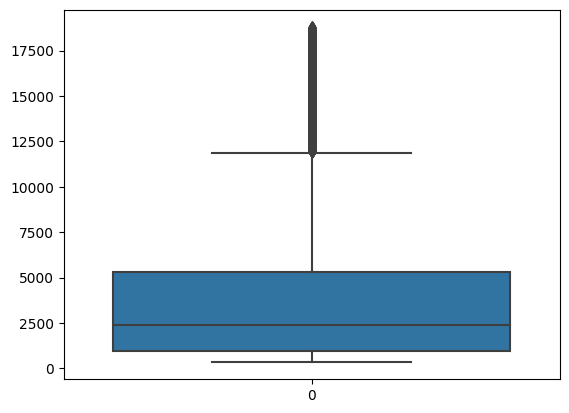

In [50]:
sns.boxplot(df.price)

<Axes: xlabel='price', ylabel='Density'>

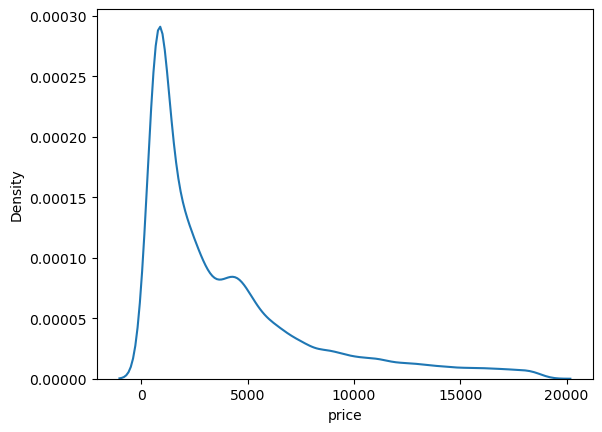

In [6]:
sns.kdeplot(df.price)

#### Price vs Other variables

In [8]:
df.corr(numeric_only =True)

,carat,price,x,y,z
carat,1.000000,0.921591,0.975094,0.951722,0.953387
price,0.921591,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.861249,0.970772,0.952006,1.000000


<Axes: >

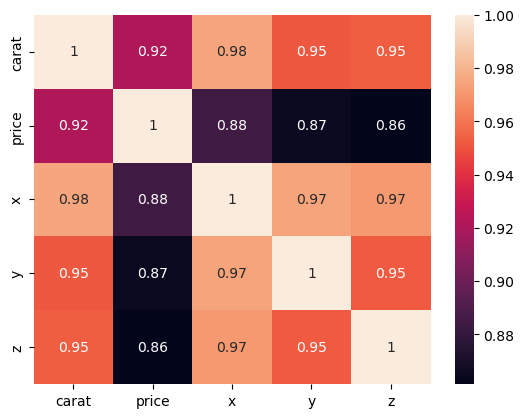

In [9]:
sns.heatmap(df.corr(numeric_only=True),annot = True)

<Axes: xlabel='price', ylabel='cut'>

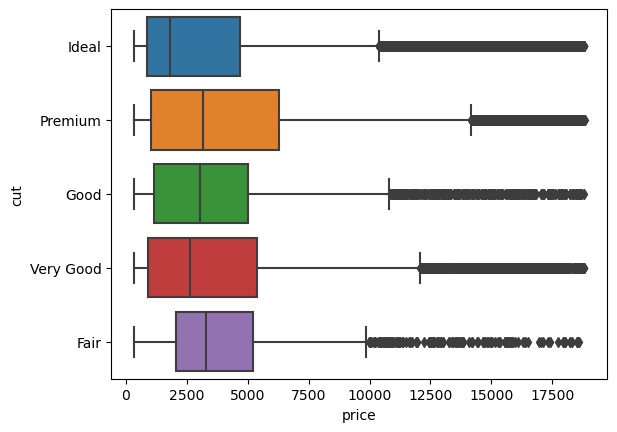

In [10]:
sns.boxplot(x = df.price,y = df.cut)

<Axes: xlabel='price', ylabel='clarity'>

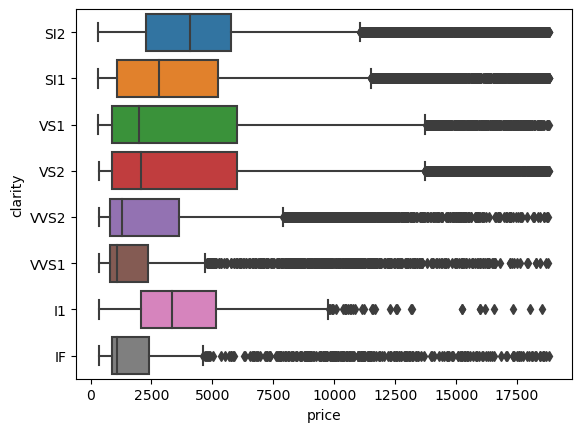

In [11]:
sns.boxplot(x = df.price,y = df.clarity)

<Axes: xlabel='price', ylabel='color'>

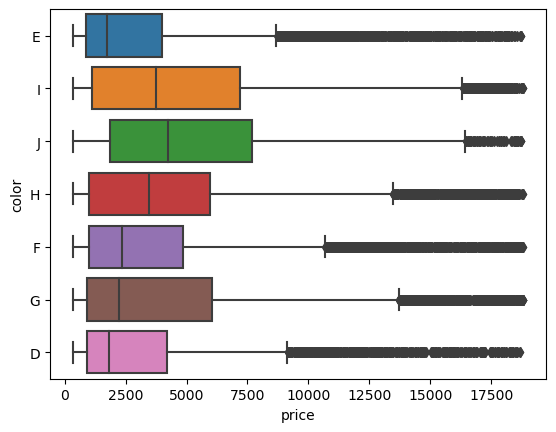

In [12]:
sns.boxplot(x = df.price,y = df.color)

<Axes: xlabel='carat', ylabel='price'>

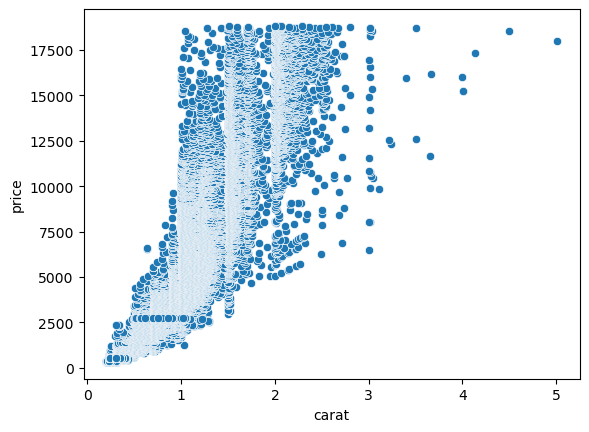

In [13]:
sns.scatterplot(x=df.carat,y=df.price)

<Axes: xlabel='carat', ylabel='price'>

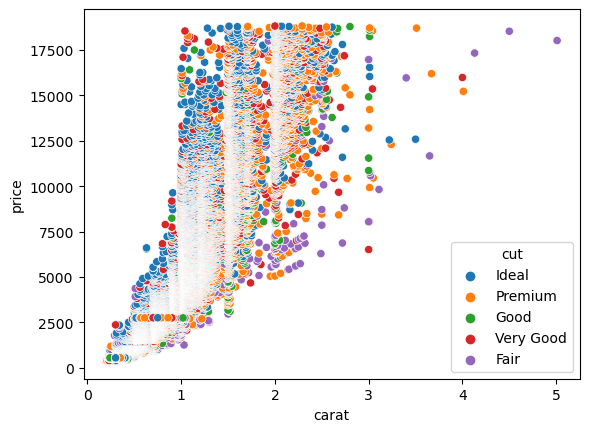

In [14]:
sns.scatterplot(x=df.carat,y=df.price,hue=df.cut)

<Axes: xlabel='carat', ylabel='price'>

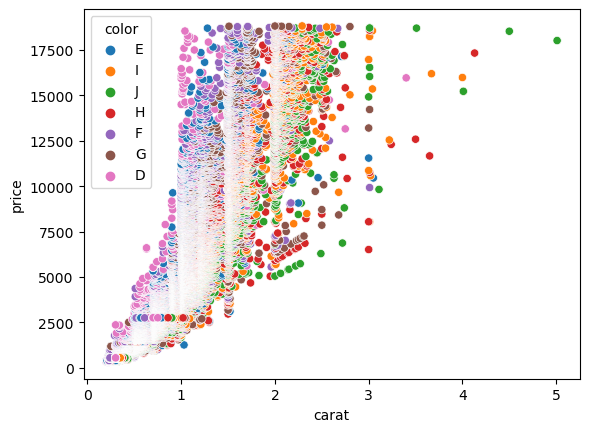

In [15]:
sns.scatterplot(x=df.carat,y=df.price,hue=df.color)

<Axes: xlabel='carat', ylabel='price'>

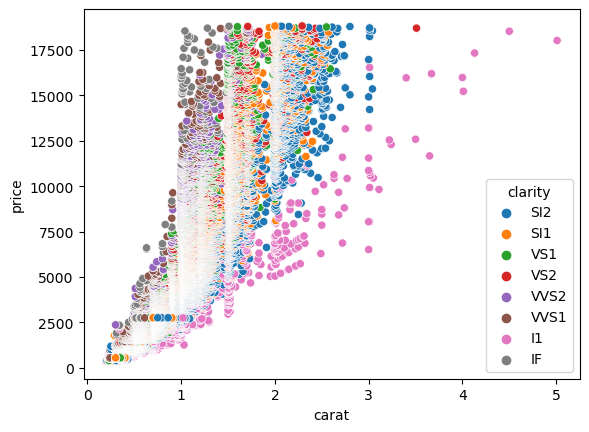

In [16]:
sns.scatterplot(x=df.carat,y=df.price,hue=df.clarity)

### Multiple Linear Regression Model

In [17]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y', 'z'], dtype='object')

In [18]:
formula = 'price ~ carat + cut + color + clarity + x + y + z'

In [19]:
lm = ols(formula = formula, data = df).fit()

In [20]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 2.931e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        00:59:37   Log-Likelihood:            -4.5584e+05
No. Observations:               53940   AIC:                         9.117e+05
Df Residuals:                   53918   BIC:                         9.119e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3642.4909     91.784  

In [21]:
pred = lm.predict(df)

In [22]:
pred

0       -1404.711879
1        -713.389439
2          65.360477
3        -807.973679
4       -3436.954475
            ...     
53935    3464.697365
53936    3134.893972
53937    3143.268782
53938    2567.263431
53939    2741.942225
Length: 53940, dtype: float64

<Axes: xlabel='price'>

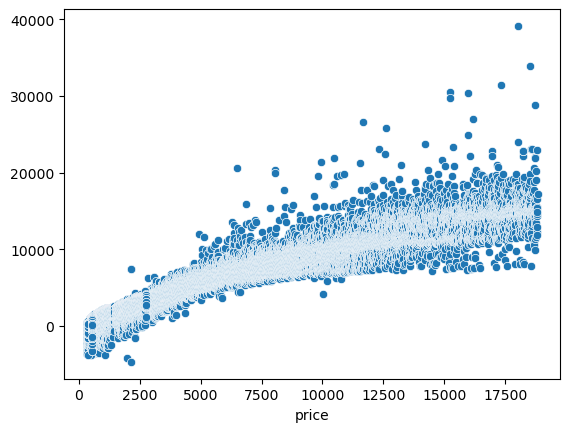

In [23]:
sns.scatterplot(x = df.price,y = pred)

In [24]:
resid = pred - df.price

<Axes: xlabel='price'>

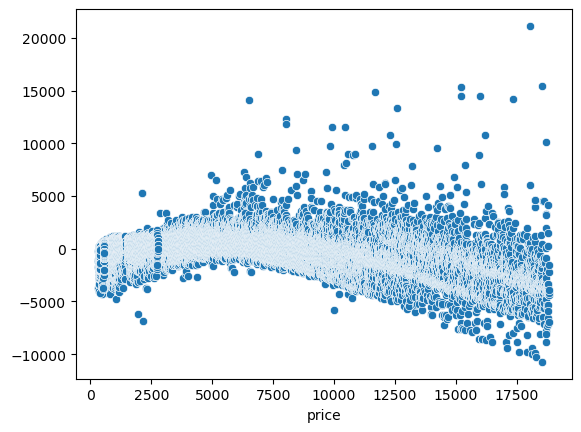

In [25]:
sns.scatterplot(x = df.price , y =resid)

<Axes: ylabel='Density'>

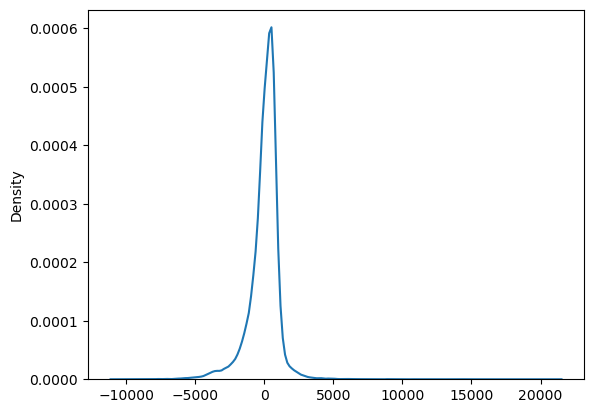

In [26]:
sns.kdeplot(resid)

# Diamond Price Prediction - Improve Model

<Axes: xlabel='price', ylabel='Density'>

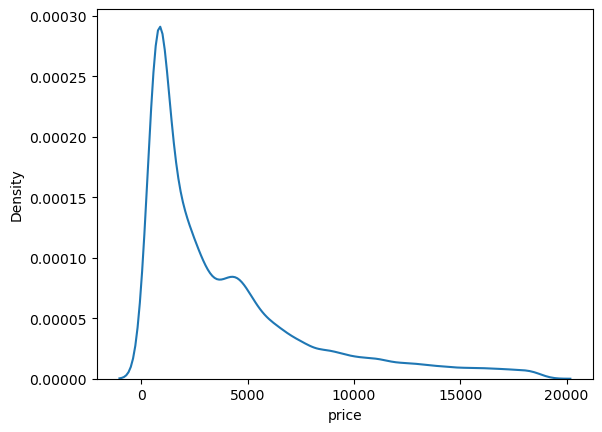

In [27]:
sns.kdeplot(df.price)

<Axes: xlabel='carat', ylabel='Density'>

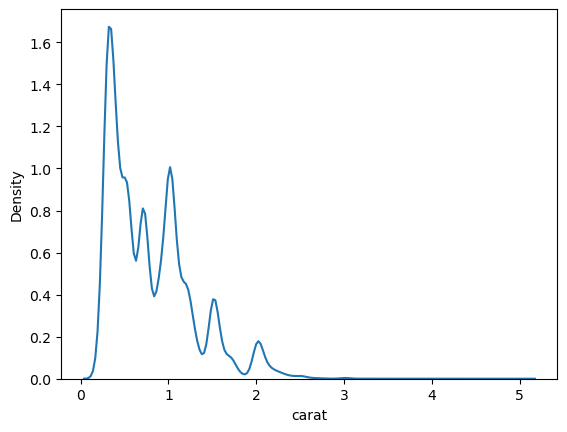

In [28]:
sns.kdeplot(df.carat)

In [29]:
df['logprice'] = np.log(df.price)
df.carat = np.log(df.carat)

<Axes: xlabel='logprice', ylabel='Density'>

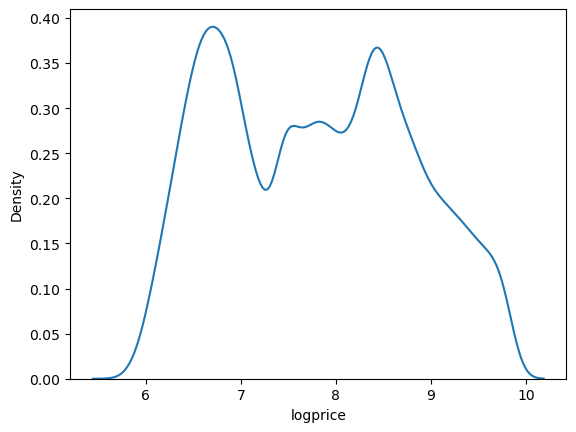

In [30]:
sns.kdeplot(df.logprice)

<Axes: xlabel='carat', ylabel='Density'>

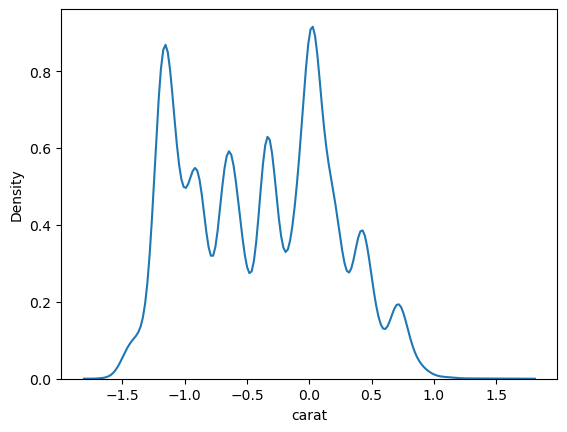

In [31]:
sns.kdeplot(df.carat)

In [33]:
df.corr(numeric_only=True)

,carat,price,x,y,z,logprice
carat,1.000000,0.855526,0.990166,0.966495,0.969060,0.965914
price,0.855526,1.000000,0.884435,0.865421,0.861249,0.895771
x,0.990166,0.884435,1.000000,0.974701,0.970772,0.958010
y,0.966495,0.865421,0.974701,1.000000,0.952006,0.936173
z,0.969060,0.861249,0.970772,0.952006,1.000000,0.935218
logprice,0.965914,0.895771,0.958010,0.936173,0.935218,1.000000


<Axes: xlabel='carat', ylabel='logprice'>

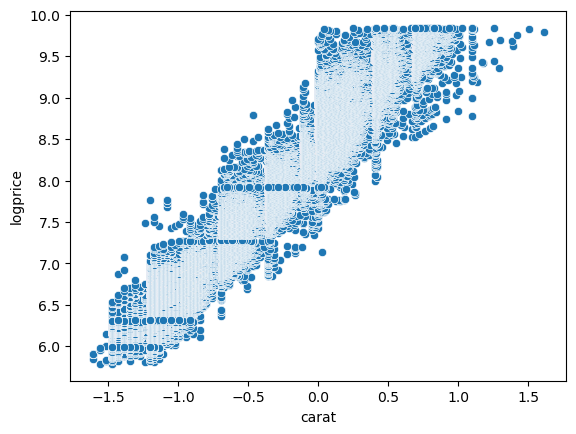

In [34]:
sns.scatterplot(x = df.carat , y = df.logprice)

In [35]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y', 'z', 'logprice'], dtype='object')

In [36]:
formula = 'logprice ~ carat + cut + color + clarity + x + y + z'
lm = ols(formula,df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.457e+05
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:00:38   Log-Likelihood:                 32072.
No. Observations:               53940   AIC:                        -6.410e+04
Df Residuals:                   53918   BIC:                        -6.390e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.4967      0.026  

In [37]:
pred = lm.predict(df)

In [38]:
pred

0        5.637099
1        5.614535
2        5.947860
3        6.034869
4        5.652836
           ...   
53935    7.986891
53936    7.907177
53937    7.890514
53938    7.882945
53939    7.898378
Length: 53940, dtype: float64

<Axes: xlabel='logprice'>

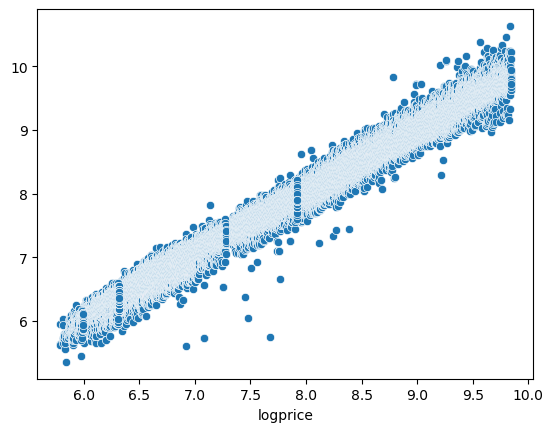

In [39]:
sns.scatterplot(x = df.logprice , y = pred)

In [40]:
resid = pred - df.logprice

<Axes: xlabel='logprice'>

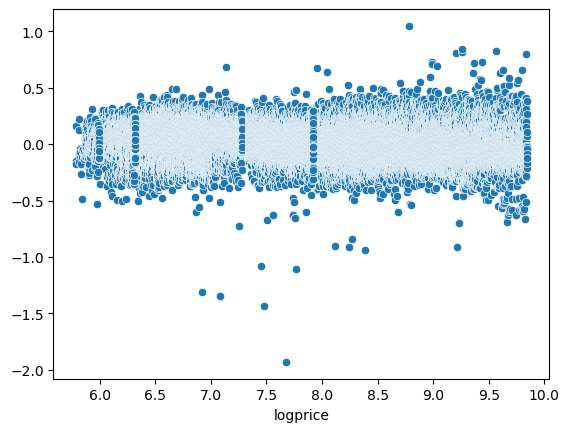

In [41]:
sns.scatterplot(x = df.logprice , y = resid)

<Axes: ylabel='Density'>

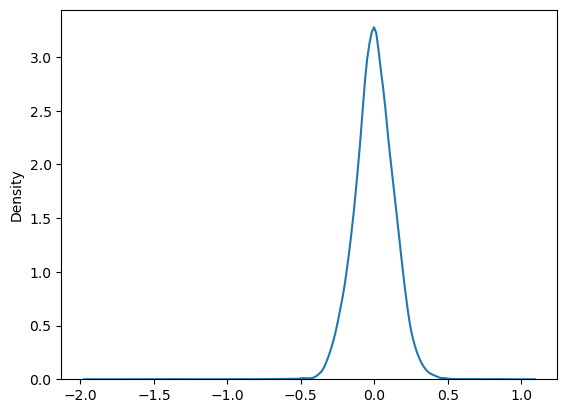

In [42]:
sns.kdeplot(resid)

In [43]:
np.exp(pred)

0         280.647327
1         274.385712
2         382.933084
3         417.744262
4         285.099003
            ...     
53935    2942.134316
53936    2716.710405
53937    2671.815551
53938    2651.669895
53939    2692.910409
Length: 53940, dtype: float64

<Axes: xlabel='price'>

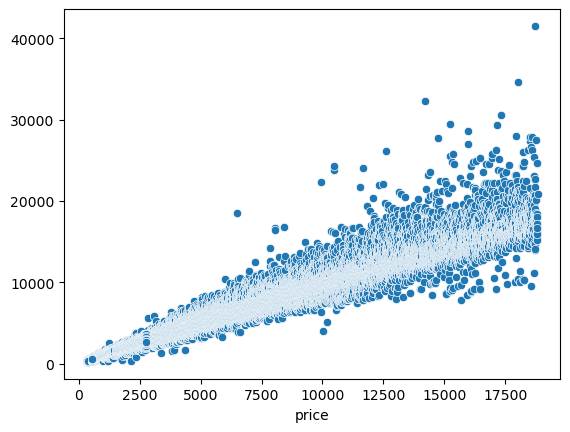

In [44]:
sns.scatterplot(x = df.price , y = np.exp(pred))

In [45]:
#End